In [27]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [28]:
data_path = "/Users/hayden/Desktop/HRMT64 data/Temperature/hrmt64_temperatures.csv"

if not os.path.exists(data_path):
    raise FileExistsError("Error: cannot find path specified")

In [32]:
df = pd.read_csv(data_path)
columns_list = df.columns.to_list()
columns_list

['Timestamp (LOCAL_TIME)',
 'Primary target top',
 'Temperature cable TNC',
 'Temperature cable TT61',
 'Temperature primary target bottom',
 'Temperature primary target top',
 'Temperature secondary target']

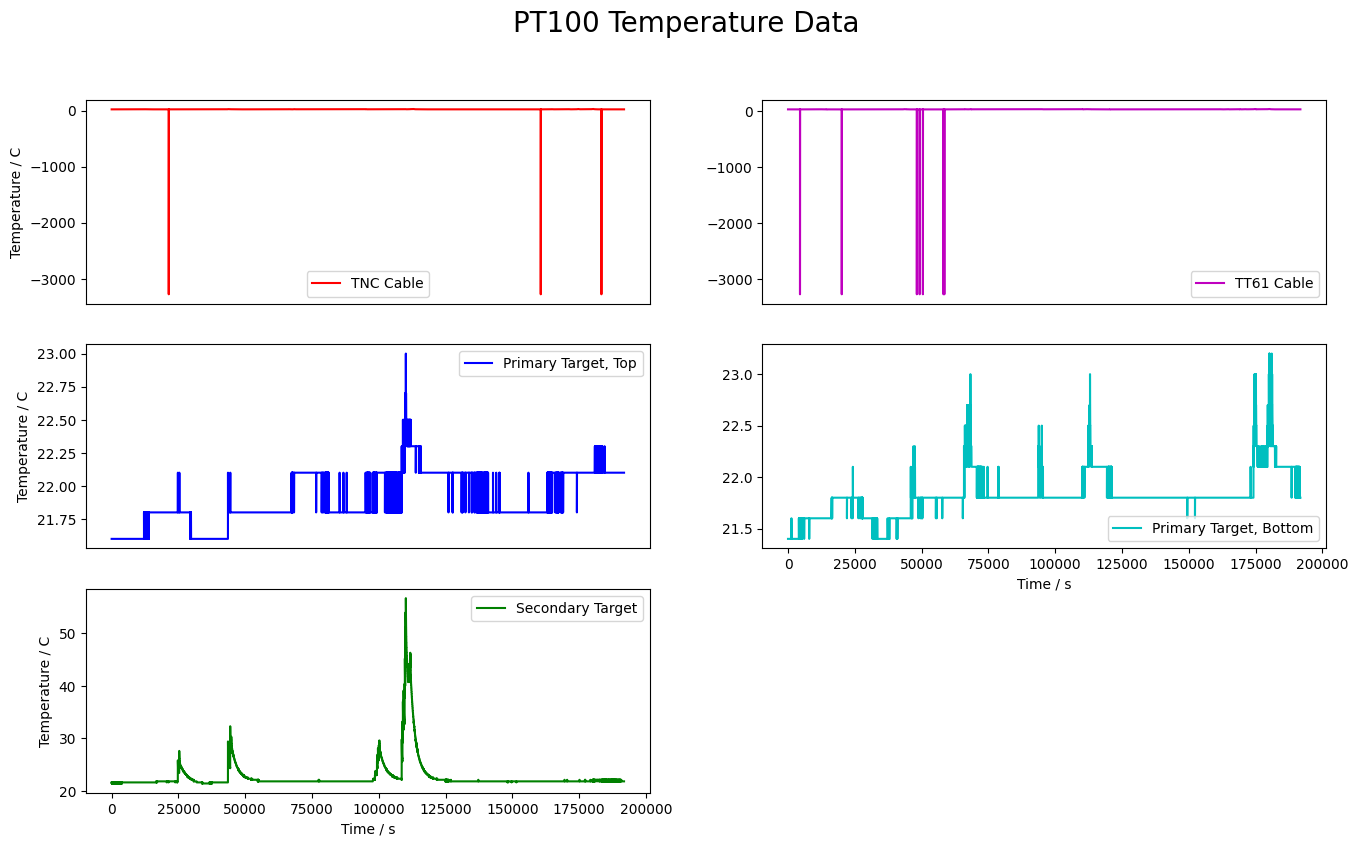

In [49]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16,9))

# TIME AXIS
time_key = columns_list[0]
time = np.arange(len(df[time_key])) #converts to seconds

# CABLE TEMPERATURES
tnc_cable_temp = df[columns_list[2]]
tt61_cable_temp = df[columns_list[3]]
axs[0,0].plot(time, tnc_cable_temp, label="TNC Cable", color="r")
axs[0,0].set_ylabel("Temperature / C")
axs[0,0].set_xticks([])
axs[0,0].legend()

axs[0,1].plot(time, tt61_cable_temp, label="TT61 Cable", color="m")
axs[0,1].legend()
axs[0,1].set_xticks([])

# PRIMARY TARGET TEMPERATURES
p_target_top_temp = df[columns_list[4]]
p_target_bot_temp = df[columns_list[5]]
axs[1,0].plot(time, p_target_bot_temp, label="Primary Target, Top", color="b")
axs[1,0].set_ylabel("Temperature / C")
axs[1,0].set_xticks([])
axs[1,0].legend()

axs[1,1].plot(time, p_target_top_temp, label="Primary Target, Bottom", color="c")
axs[1,1].set_xlabel("Time / s")
axs[1,1].legend()

# SECONDARY TARGET TEMPERATURES
s_target_temp = df[columns_list[6]]
axs[2,0].plot(time, s_target_temp, label="Secondary Target", color="g")
axs[2,0].set_ylabel("Temperature / C")
axs[2,0].legend()
axs[2,0].set_xlabel("Time / s")

axs[2,1].axis("off")

fig.suptitle("PT100 Temperature Data", fontsize=20)
plt.show()